In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/Rajasthan.csv", encoding='ISO-8859-1',low_memory=False)

df

,CORPORATE_IDENTIFICATION_NUMBER,Company_Name,Company_status,Company_class,Company_Category,Company_sub_category,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,Industrial_Class,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registered_Office_Address,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,Latest_Year_AR,Latest_Year_BS
0,L01100RJ1979PLC001851,SABOO BROTHERS LIMITED,Active,Public,Company limited by Shares,Non-govt company,06-02-79,Rajasthan,65100000.0,60962000.0,1100,"Agriculture, hunting and related service activ...",332 B-BLOCK ANAND PLAZA UNIVERSITY ROAD UDAIPU...,RoC-Jaipur,saboo.brothers@gmail.com,31-03-20,31-03-20
1,L01110RJ2006PLC047173,BAJAJ CONSUMER CARE LIMITED,Active,Public,Company limited by Shares,Non-govt company,25-04-06,Rajasthan,200000000.0,147534346.0,1110,"Agriculture, hunting and related service activ...","Old Station Road Sevashram Chouraha Udaipur , ...",RoC-Jaipur,sethu@bajajconsumer.com,31-03-20,31-03-20
2,L01300RJ1995PLC009541,H R B FLORICULTURE LIMITED,Active,Public,Company limited by Shares,Non-govt company,20-02-95,Rajasthan,55000000.0,22763000.0,1300,"Agriculture, hunting and related service activ...","A-28,RAM NAGAR SHASTRI NAGAR JAIPUR , Unclassi...",RoC-Jaipur,hrbflrltd@yahoo.com,31-03-20,31-03-20
3,L14100RJ1980PLC002145,RAJDARSHAN INDUSTRIES LIMITED,Active,Public,Company limited by Shares,Non-govt company,26-12-80,Rajasthan,39000000.0,31083000.0,14100,Other mining and quarrying,"59, MOTI MAGRI SCHEME, UDAIPUR59 MOTI MAGRI SC...",RoC-Jaipur,info@rajdarshanindustrieslimited.com,31-03-20,31-03-20
4,L14101RJ1979PLC001928,LUSTRE TILES LTD,Active,Public,Company limited by Shares,Non-govt company,22-09-79,Rajasthan,35000000.0,22132000.0,14101,Other mining and quarrying,"A65-66,RIICO INDUSTRIAL AREA,BHIWADI,DISTT.ALW...",RoC-Jaipur,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67790,U99999RJ9999PLC014521,DHANPATRAI GRANITES LIMITED,Strike Off,Public,Company limited by Shares,Non-govt company,24-12-97,Rajasthan,900000.0,7000.0,99999,Extraterritorial organizations and bodies,"RAJASTHANRAJASTHAN RAJASTHAN RAJASTHAN , Uncla...",RoC-Jaipur,NaN,NaN,NaN
67791,U21020RJ2009PLC001955,SATSUVAN PAPER MILLS LTD,Under liquidation,Public,Company limited by Shares,Non-govt company,NaN,Rajasthan,1000000.0,10000.0,21020,Manufacture of paper and paper products,"Uco Bank Building, Chandpole Bazar, Jaipur , U...",RoC-Jaipur,NaN,NaN,NaN
67792,U27105RJ2010PLC002255,RAJ PROCESSING LIMITED,Under Process of Striking off,Public,Company limited by Shares,Non-govt company,NaN,Rajasthan,5000000.0,350.0,27105,Manufacture of basic metals,"RAJASTHAN RAJASTHAN RAJASTHAN , Unclassified R...",RoC-Jaipur,NaN,NaN,NaN
67793,U51101RJ1943PTC000160,PANNA TRADING CO PVT LTD,Strike Off,Private,Company limited by Shares,Non-govt company,NaN,Rajasthan,8000000.0,0.0,51101,"Wholesale trade and commission trade, except o...",", Unclassified RJ",RoC-Jaipur,NaN,NaN,NaN


In [3]:

# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

C:\Users\kings\AppData\Local\Temp\ipykernel_12564\2224013709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)
C:\Users\kings\AppData\Local\Temp\ipykernel_12564\2224013709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year


In [4]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
Company_Name                                  0
Company_status                                0
Company_class                                26
Company_Category                             26
Company_sub_category                         26
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
Industrial_Class                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
Registered_Office_Address                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                 8333
Latest_Year_AR                            25416
Latest_Year_BS                            25388
Registration_Year                             0
dtype: int64

In [5]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

,CORPORATE_IDENTIFICATION_NUMBER,Company_Name,Company_status,Company_class,Company_Category,Company_sub_category,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,Industrial_Class,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registered_Office_Address,REGISTRAR_OF_COMPANIES,Latest_Year_AR,Latest_Year_BS,Registration_Year
0,L01100RJ1979PLC001851,SABOO BROTHERS LIMITED,Active,Public,Company limited by Shares,Non-govt company,Rajasthan,65100000.0,60962000.0,1100,"Agriculture, hunting and related service activ...",332 B-BLOCK ANAND PLAZA UNIVERSITY ROAD UDAIPU...,RoC-Jaipur,31-03-20,31-03-20,1979
1,L01110RJ2006PLC047173,BAJAJ CONSUMER CARE LIMITED,Active,Public,Company limited by Shares,Non-govt company,Rajasthan,200000000.0,147534346.0,1110,"Agriculture, hunting and related service activ...","Old Station Road Sevashram Chouraha Udaipur , ...",RoC-Jaipur,31-03-20,31-03-20,2006
2,L01300RJ1995PLC009541,H R B FLORICULTURE LIMITED,Active,Public,Company limited by Shares,Non-govt company,Rajasthan,55000000.0,22763000.0,1300,"Agriculture, hunting and related service activ...","A-28,RAM NAGAR SHASTRI NAGAR JAIPUR , Unclassi...",RoC-Jaipur,31-03-20,31-03-20,1995
3,L14100RJ1980PLC002145,RAJDARSHAN INDUSTRIES LIMITED,Active,Public,Company limited by Shares,Non-govt company,Rajasthan,39000000.0,31083000.0,14100,Other mining and quarrying,"59, MOTI MAGRI SCHEME, UDAIPUR59 MOTI MAGRI SC...",RoC-Jaipur,31-03-20,31-03-20,1980
4,L14101RJ1979PLC001928,LUSTRE TILES LTD,Active,Public,Company limited by Shares,Non-govt company,Rajasthan,35000000.0,22132000.0,14101,Other mining and quarrying,"A65-66,RIICO INDUSTRIAL AREA,BHIWADI,DISTT.ALW...",RoC-Jaipur,NaN,NaN,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67786,U99999RJ9999PLC009310,JALORE GRANITES PVT. LTD.,Strike Off,Public,Company limited by Shares,Non-govt company,Rajasthan,500000.0,2000.0,99999,Extraterritorial organizations and bodies,"PRATAP NAGARSIWANCHI GATE JODHPUR RAJASTHAN. ,...",RoC-Jaipur,NaN,NaN,1995
67787,U99999RJ9999PLC010418,C.M.STEELS PRIVATE LIMITED,Strike Off,Public,Company limited by Shares,Non-govt company,Rajasthan,100000.0,200.0,99999,Extraterritorial organizations and bodies,"RAJASTHANRAJASTHAN RAJASTHAN RAJASTHAN , Uncla...",RoC-Jaipur,NaN,NaN,1995
67788,U99999RJ9999PLC011037,APANA RESORT AND WATER PARKS LTD,Strike Off,Public,Company limited by Shares,Non-govt company,Rajasthan,100000.0,4000.0,99999,Extraterritorial organizations and bodies,"RAJASTHANRAJASTHAN RAJASTHAN RAJASTHAN , Uncla...",RoC-Jaipur,NaN,NaN,1995
67789,U99999RJ9999PLC011925,FITPACK FINANCIAL SRVICES LTD,Strike Off,Public,Company limited by Shares,Non-govt company,Rajasthan,100000.0,7000.0,99999,Extraterritorial organizations and bodies,"RAJASTHANRAJASTHAN RAJASTHAN RAJASTHAN , Uncla...",RoC-Jaipur,NaN,NaN,1996


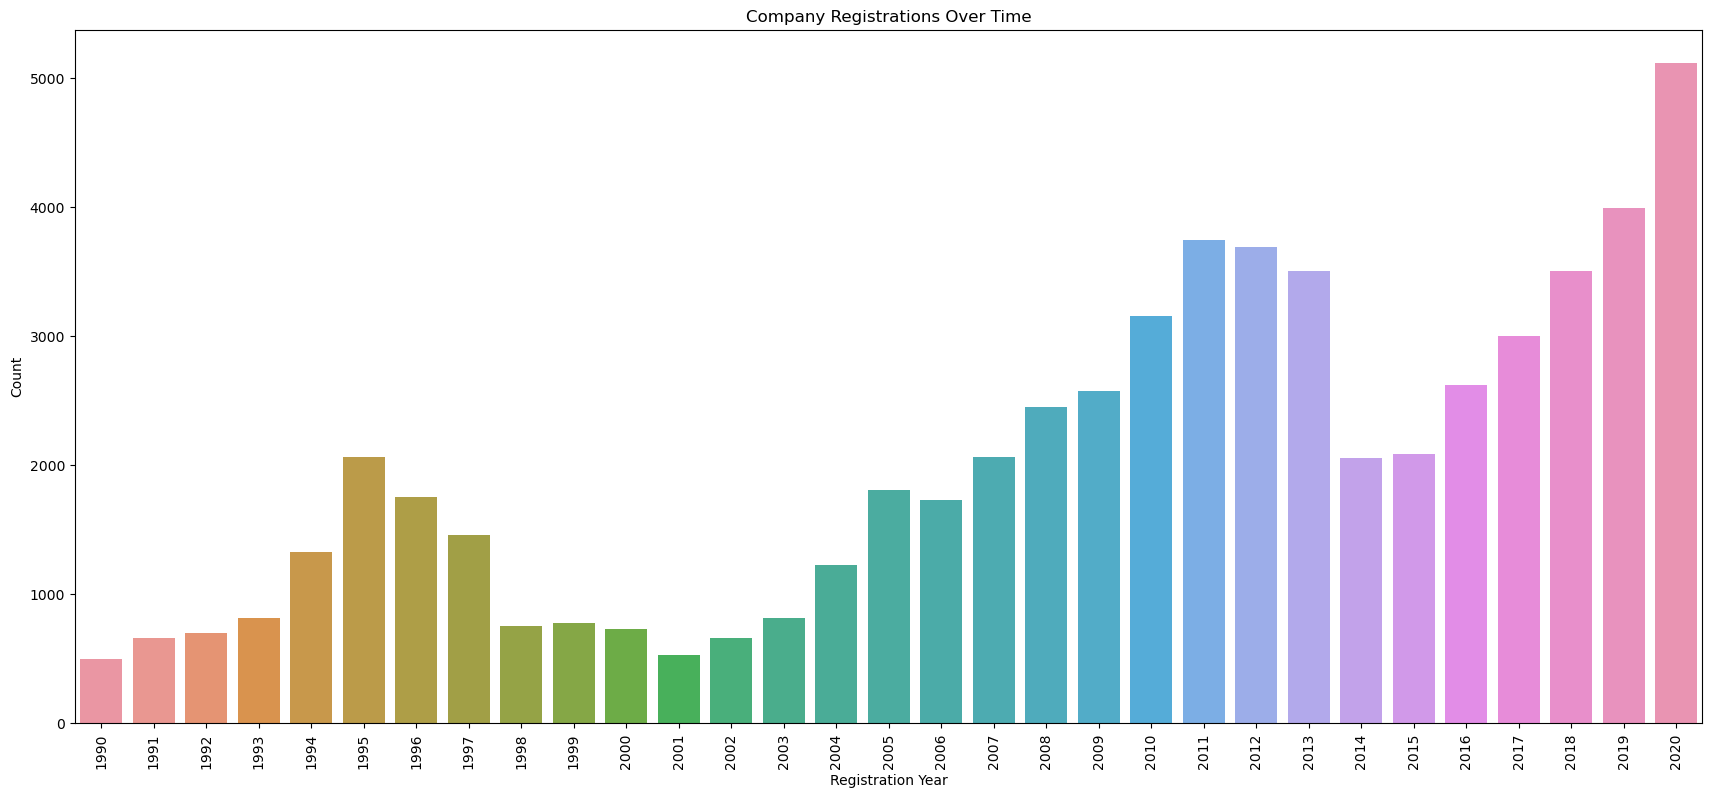

In [6]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

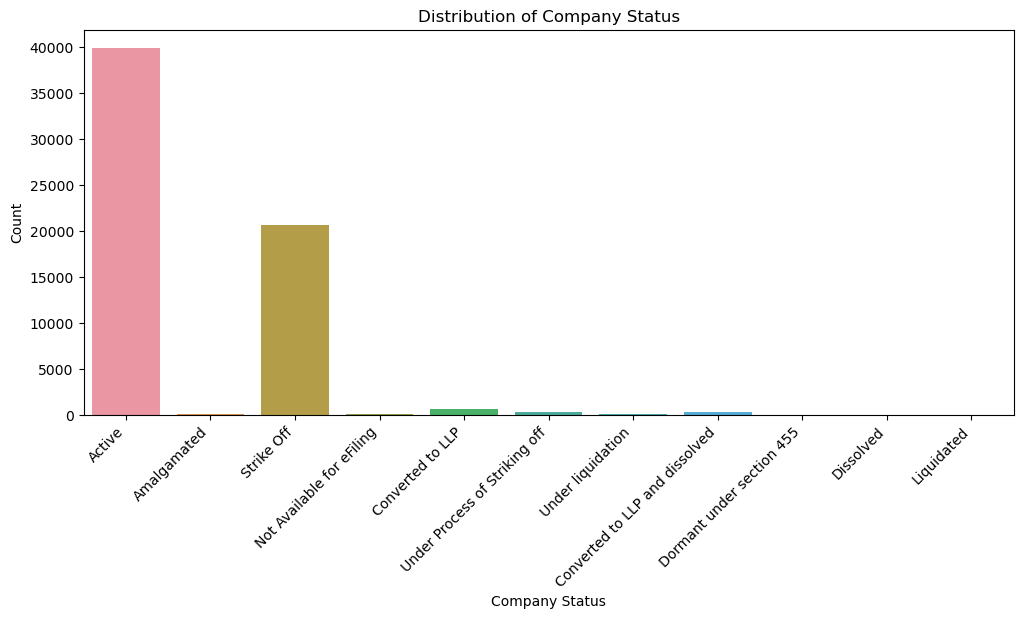

In [7]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

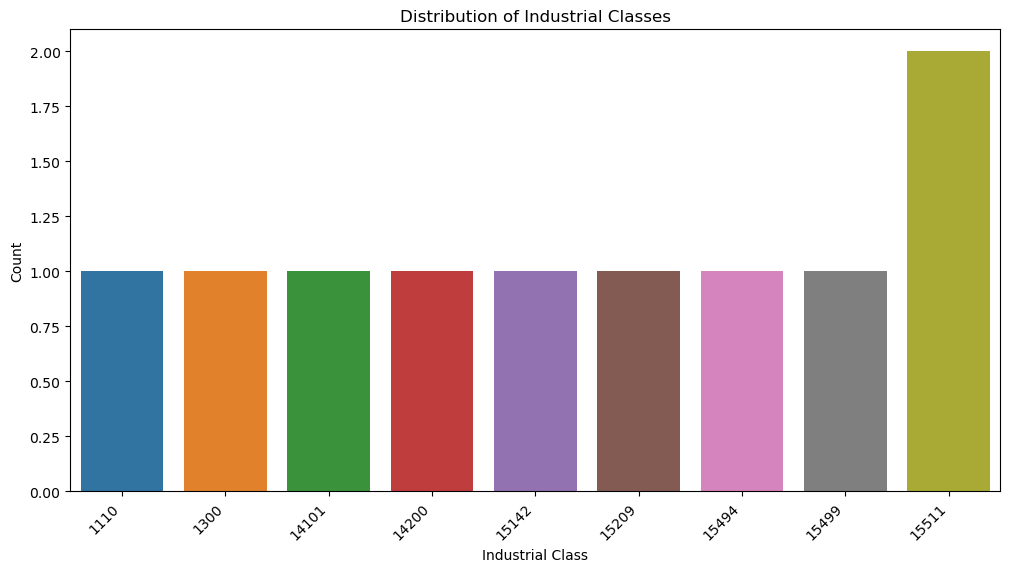

In [10]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

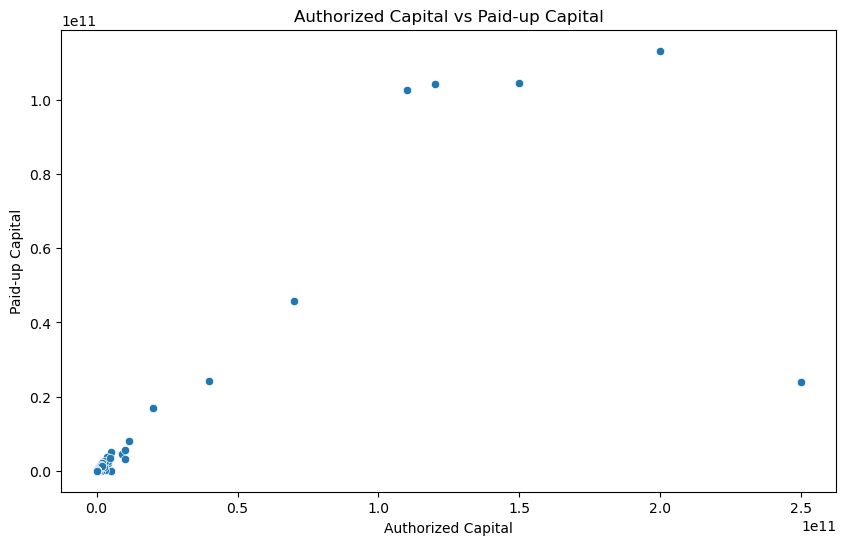

In [11]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [12]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' 'Company Limited by Guarantee' nan
 'Unlimited Company']


In [13]:
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

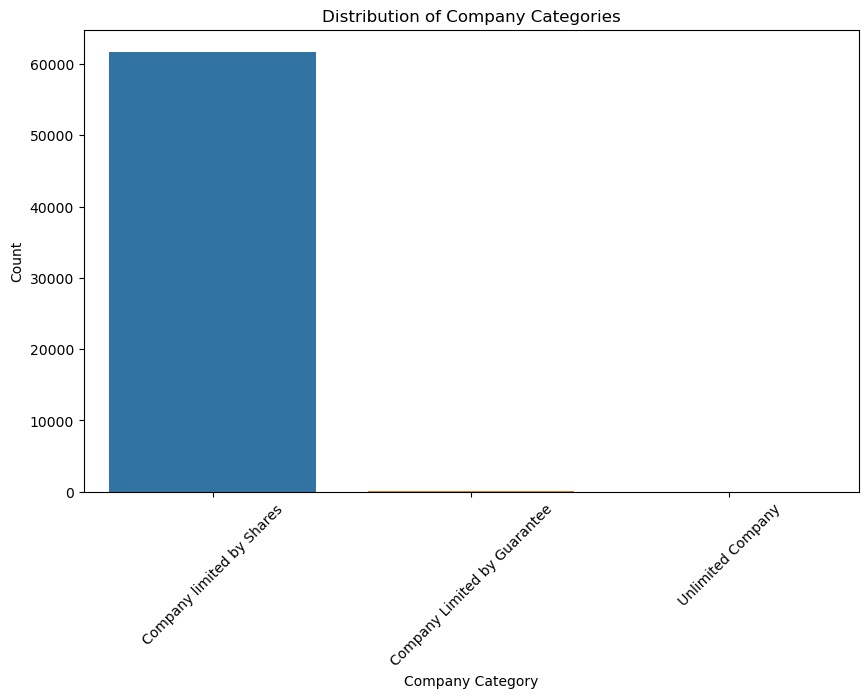

In [14]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

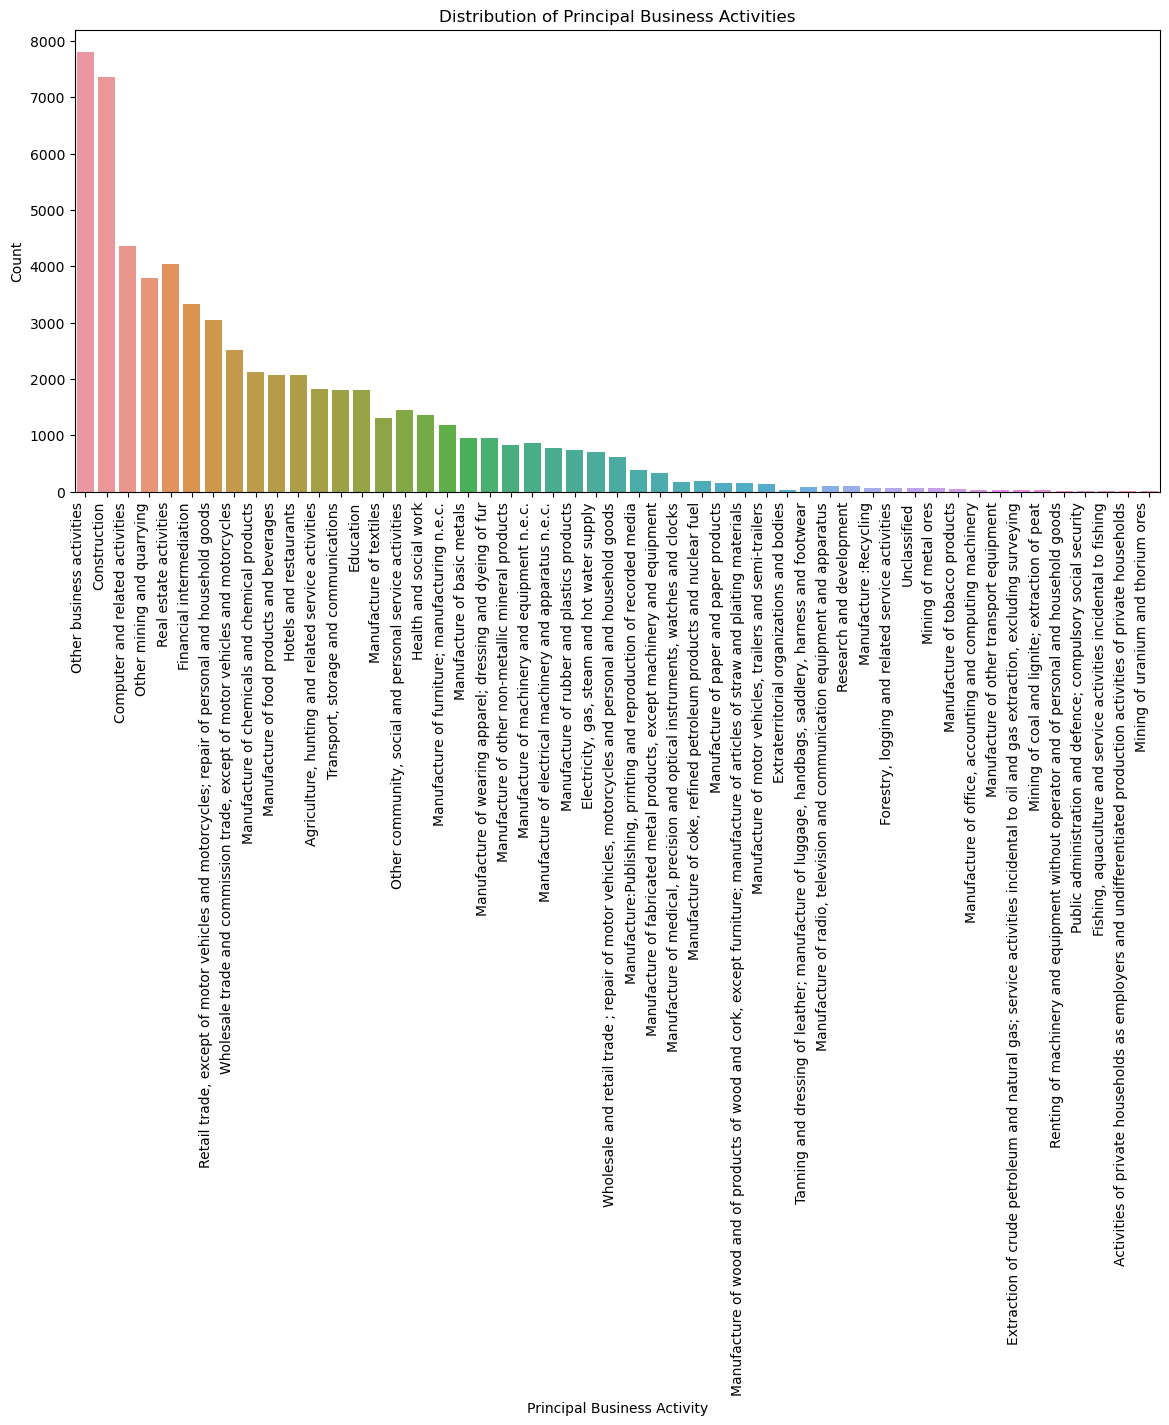

In [15]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

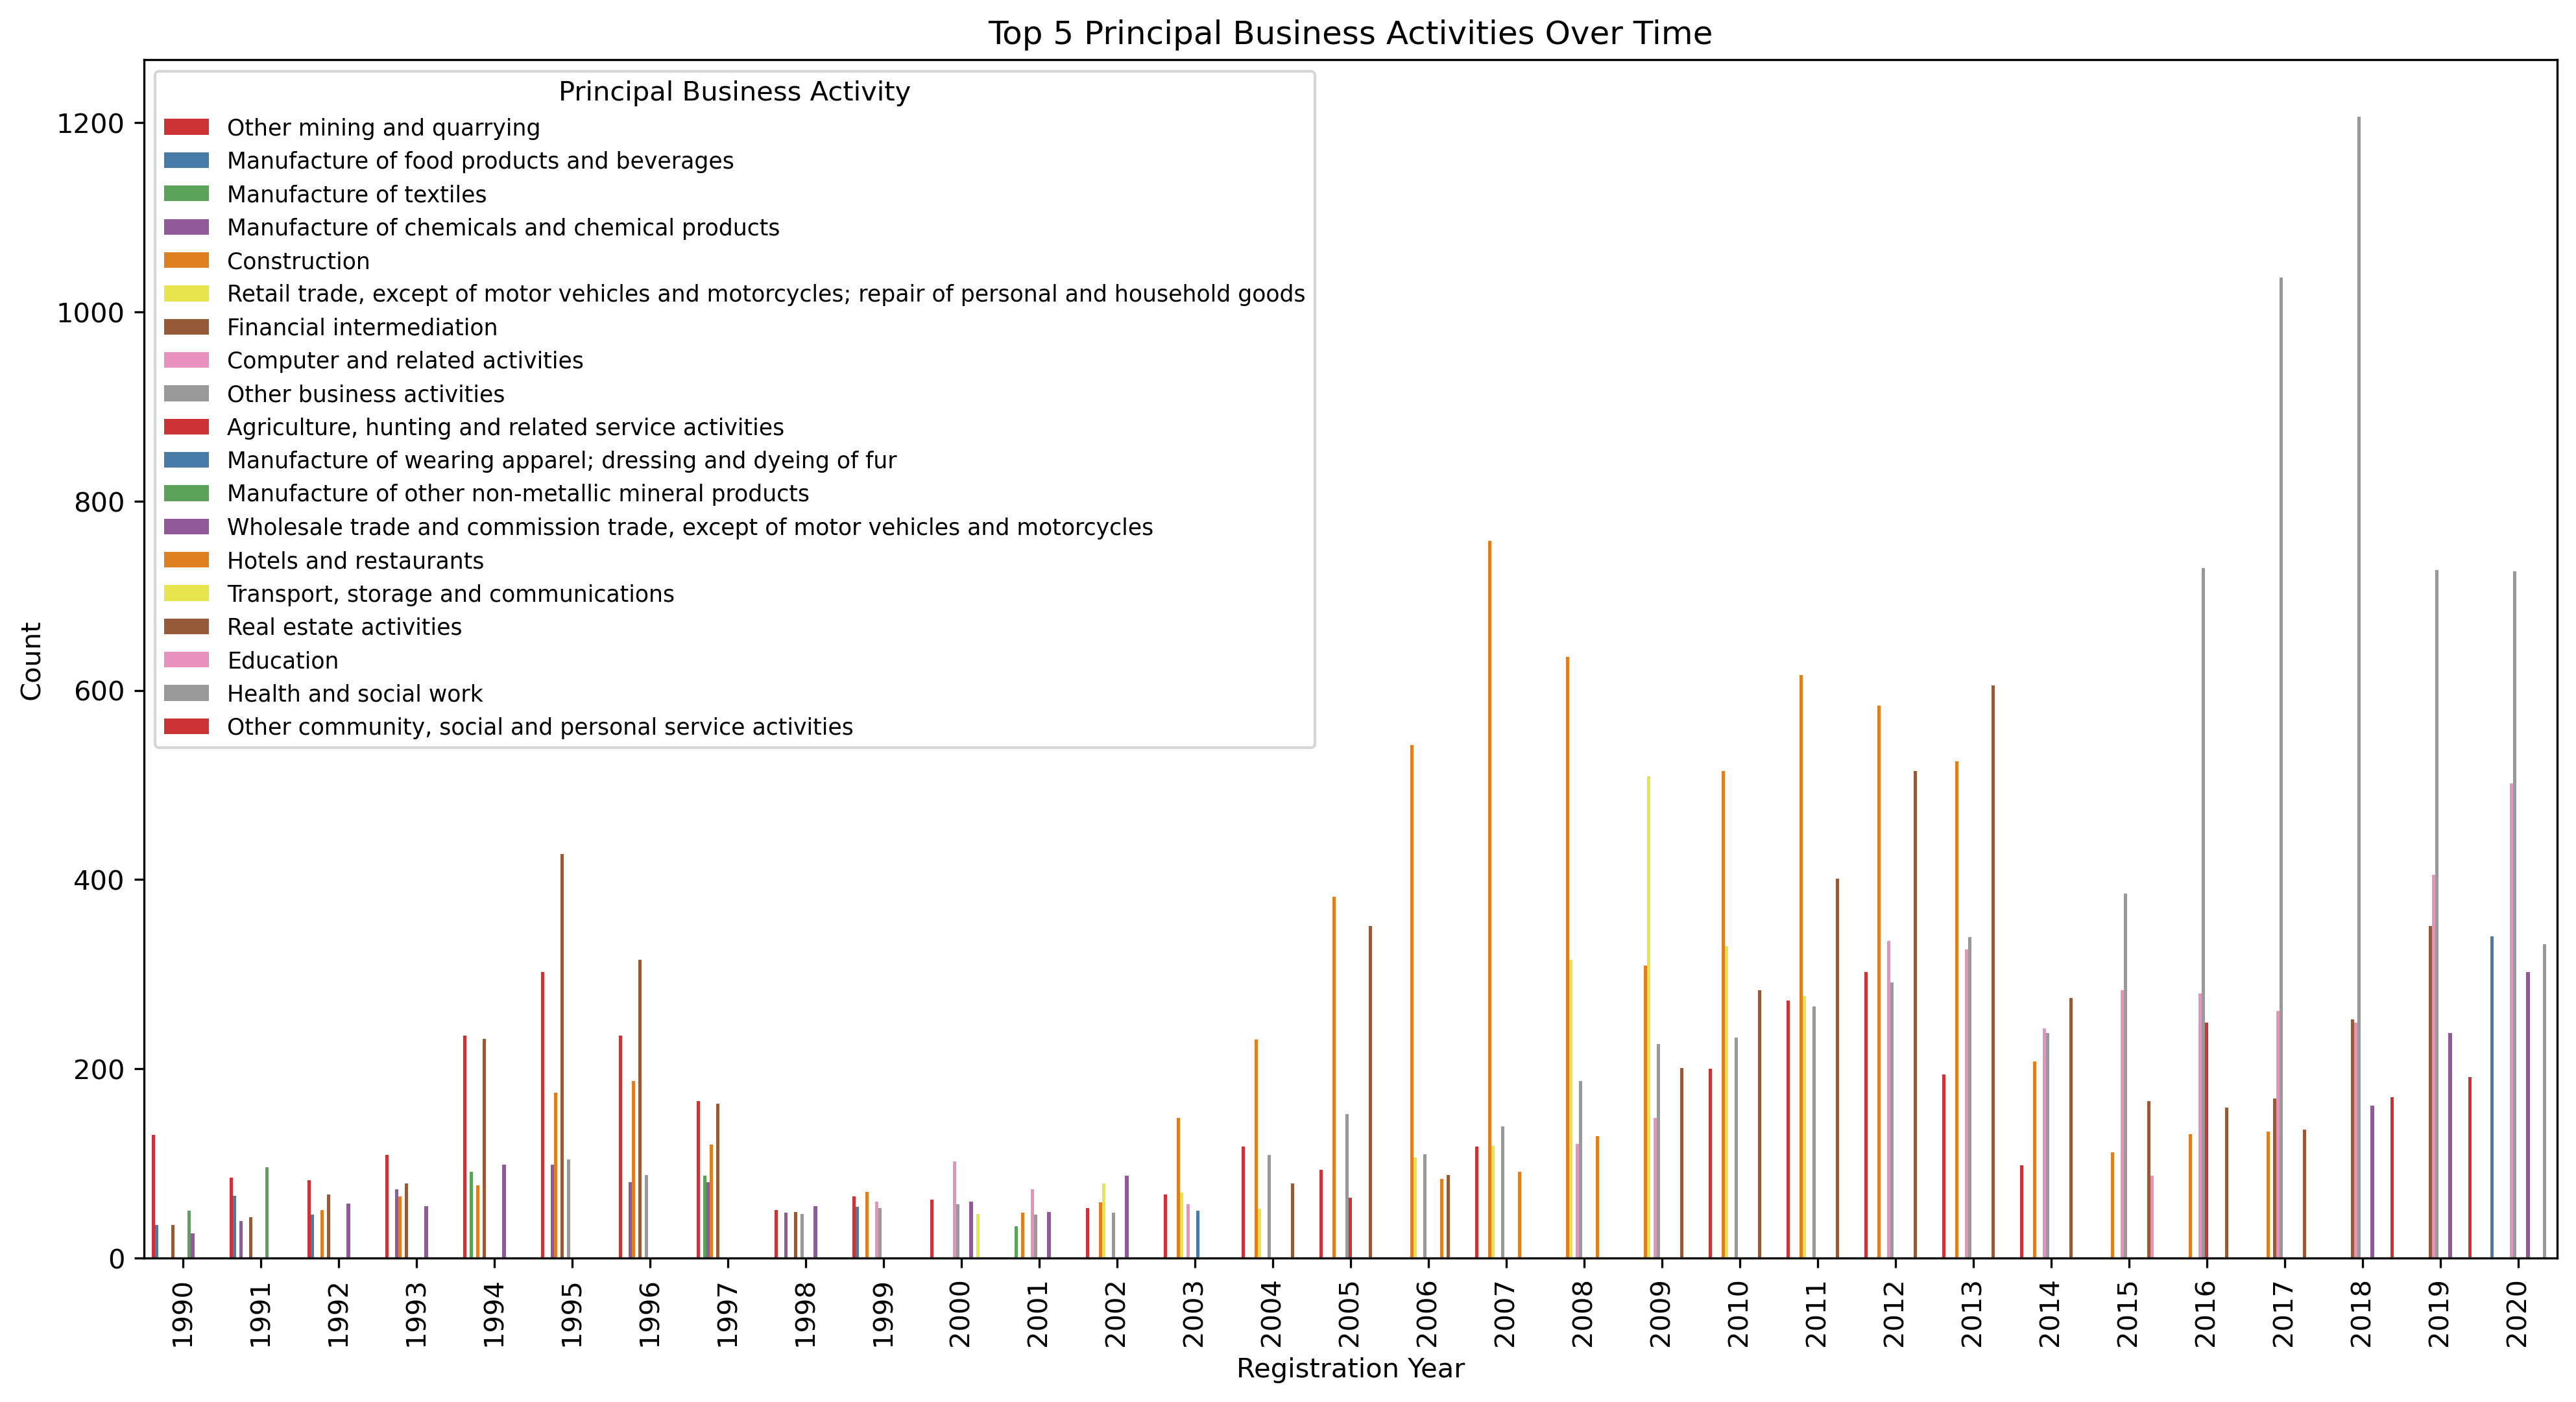

In [16]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [17]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities          5386
Computer and related activities    2549
Real estate activities             1662
Construction                       1648
Financial intermediation           1311
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


###  Authorized capital

In [18]:
# Convert columns to appropriate data types
# Use .loc to ensure you're modifying the original DataFrame
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()

In [20]:
#Trend analysis of Authorized capital
# Ensure the DataFrame is sorted by the time column
df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
activity_trend_df2


,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registration_Year,CAPITAL_CHANGE
0,Activities of private households as employers ...,1998,0.000000
1,Activities of private households as employers ...,2019,0.000000
2,Activities of private households as employers ...,2020,0.000000
3,"Agriculture, hunting and related service activ...",1976,0.000000
4,"Agriculture, hunting and related service activ...",1979,0.000000
...,...,...,...
2114,"Wholesale trade and commission trade, except o...",2069,0.000000
2115,"Wholesale trade and commission trade, except o...",2070,6.000667
2116,"Wholesale trade and commission trade, except o...",2071,0.683333
2117,"Wholesale trade and commission trade, except o...",2072,0.741667


### Comparison Score

In [21]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df

,Activity_1,Activity_2,Comparison
0,Activities of private households as employers ...,"Agriculture, hunting and related service activ...",0.025775
1,Activities of private households as employers ...,Computer and related activities,0.185997
2,Activities of private households as employers ...,Construction,0.025117
3,Activities of private households as employers ...,Education,0.041730
4,Activities of private households as employers ...,"Electricity, gas, steam and hot water supply",0.000152
...,...,...,...
1270,"Transport, storage and communications",Wholesale and retail trade ; repair of motor v...,1.115072
1271,"Transport, storage and communications","Wholesale trade and commission trade, except o...",6.009137
1272,Unclassified,Wholesale and retail trade ; repair of motor v...,0.633621
1273,Unclassified,"Wholesale trade and commission trade, except o...",3.414593


### Liquidity Ratios

In [22]:
# Liquidity Ratios: This calculates the liquidity ratio (authorized capital to paid-up capital) for each company.
# It is crucial for assessing the financial health of a company.
# Make sure 'df' is the original DataFrame or explicitly create a copy if it's a subset
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df

Smaller DataFrame showcasing Liquidity Ratios:


,Company_Name,AUTHORIZED_CAP,PAIDUP_CAPITAL,LIQUIDITY_RATIO
58251,JHUNJHUNU COMMERCIAL COMPANY LIMITED,500000.0,2000.0,250.000000
67663,G MAHALAXMI LAGHU UDYOG PVT LTD,500000.0,25000.0,20.000000
58252,KOTEX INDIA PRIVATE LIMITED,1000000.0,2000.0,500.000000
9155,THE KRISHNA MILLS LTD,30000000.0,18348500.0,1.635011
9156,THE RAJPUTANA COTTON PRESS COMPANYPRIVATE LIMITED,100000.0,100000.0,1.000000
...,...,...,...,...
10747,REGISTHAN PVT LTD,500000.0,300.0,1666.666667
19478,POWERPLANTS SALE AND SERVICE PVT LTD,500000.0,500000.0,1.000000
57640,ALLIED PACKAGING INDUSTRIES AND AGENCIES PVT LTD,300000.0,50000.0,6.000000
17603,DEWAN CHAND STEELS LIMITED,5000000.0,7000.0,714.285714


# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

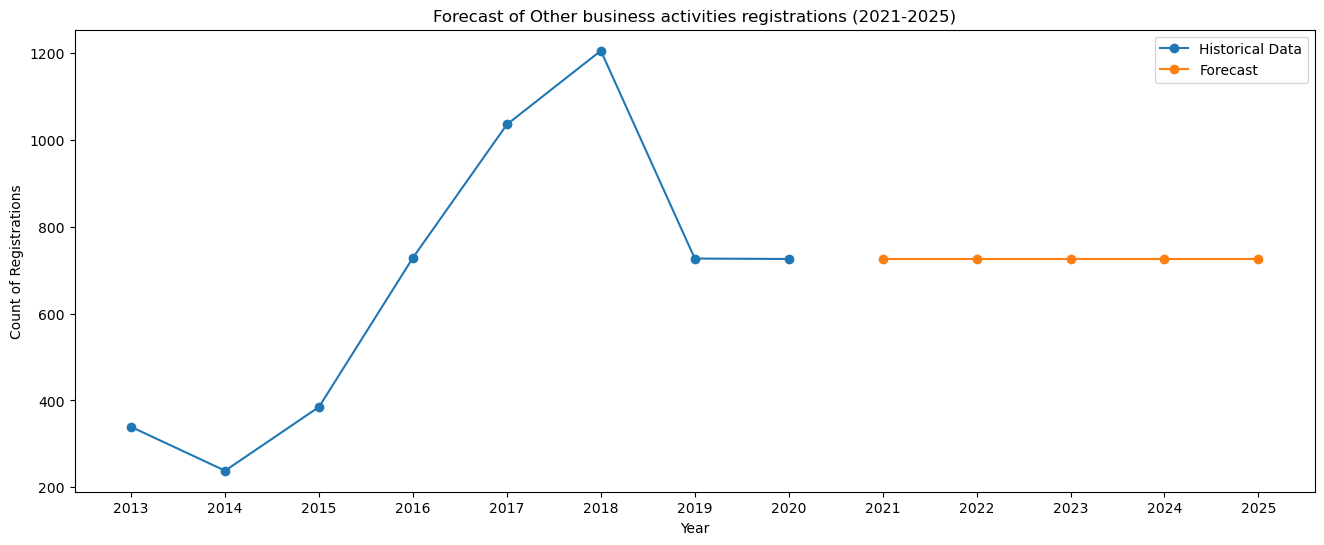

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    726.014092
2022-01-01    726.000001
2023-01-01    726.014090
2024-01-01    726.000002
2025-01-01    726.014089
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


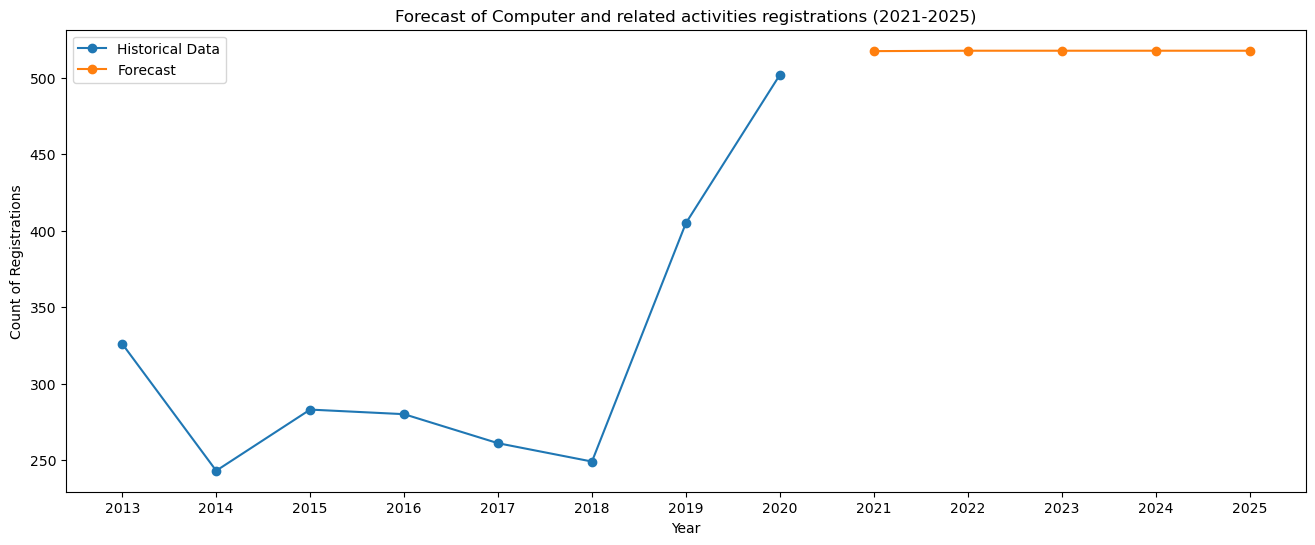

Forecasted registrations for Computer and related activities for 2021-2025:
2021-01-01    517.539923
2022-01-01    517.796102
2023-01-01    517.800325
2024-01-01    517.800395
2025-01-01    517.800396
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

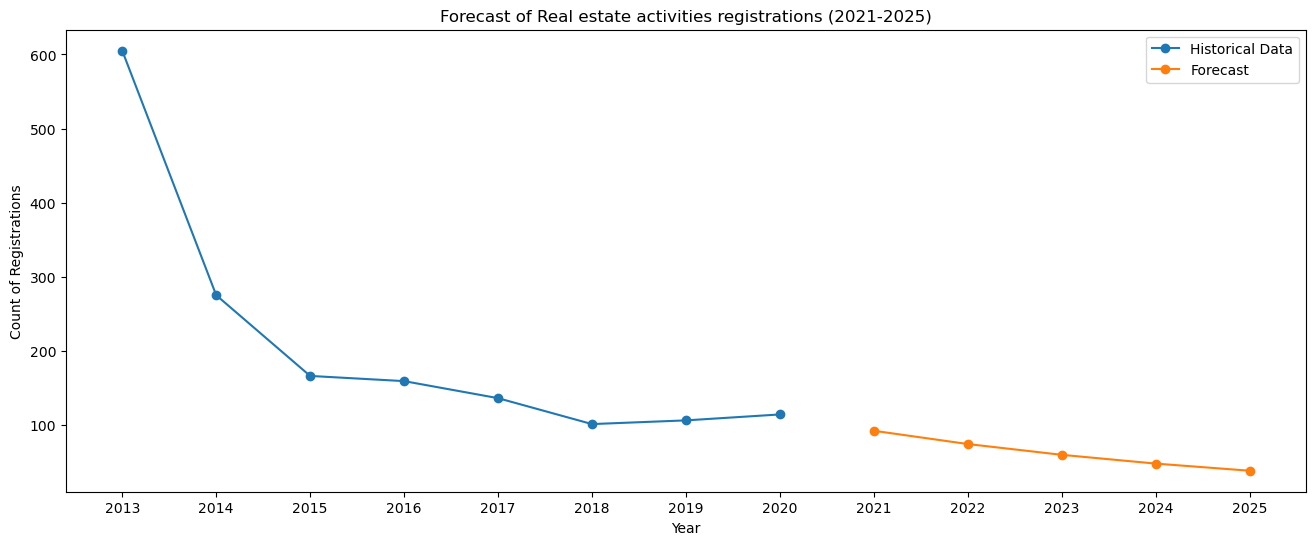

Forecasted registrations for Real estate activities for 2021-2025:
2021-01-01    91.982478
2022-01-01    74.076799
2023-01-01    59.515063
2024-01-01    47.672778
2025-01-01    38.042078
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


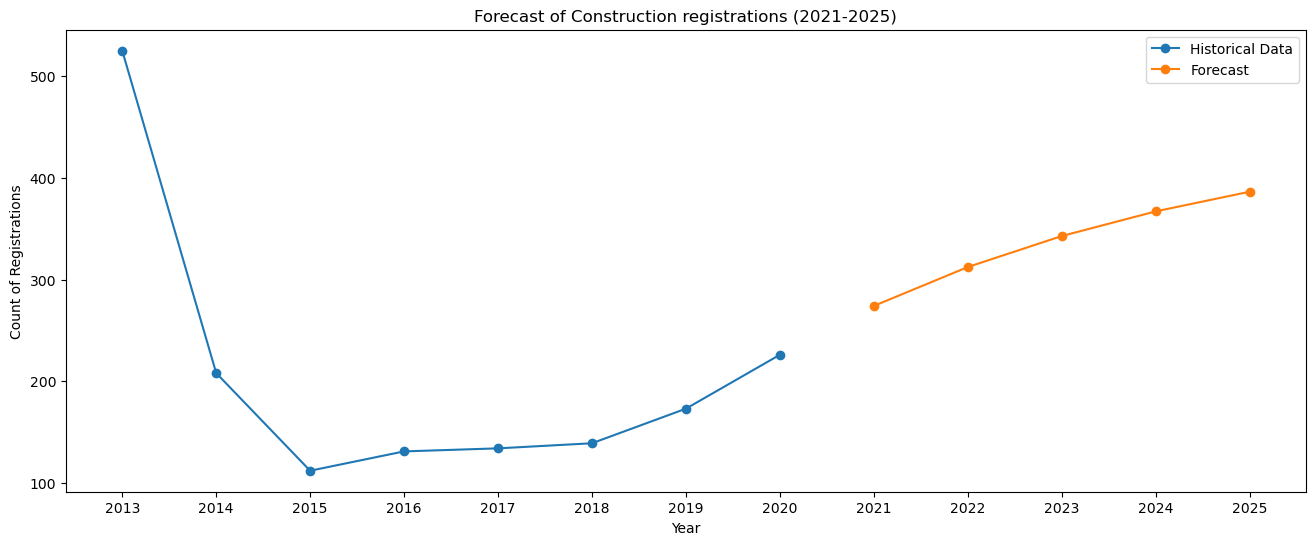

Forecasted registrations for Construction for 2021-2025:
2021-01-01    274.020629
2022-01-01    312.269723
2023-01-01    342.735656
2024-01-01    367.002192
2025-01-01    386.330824
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

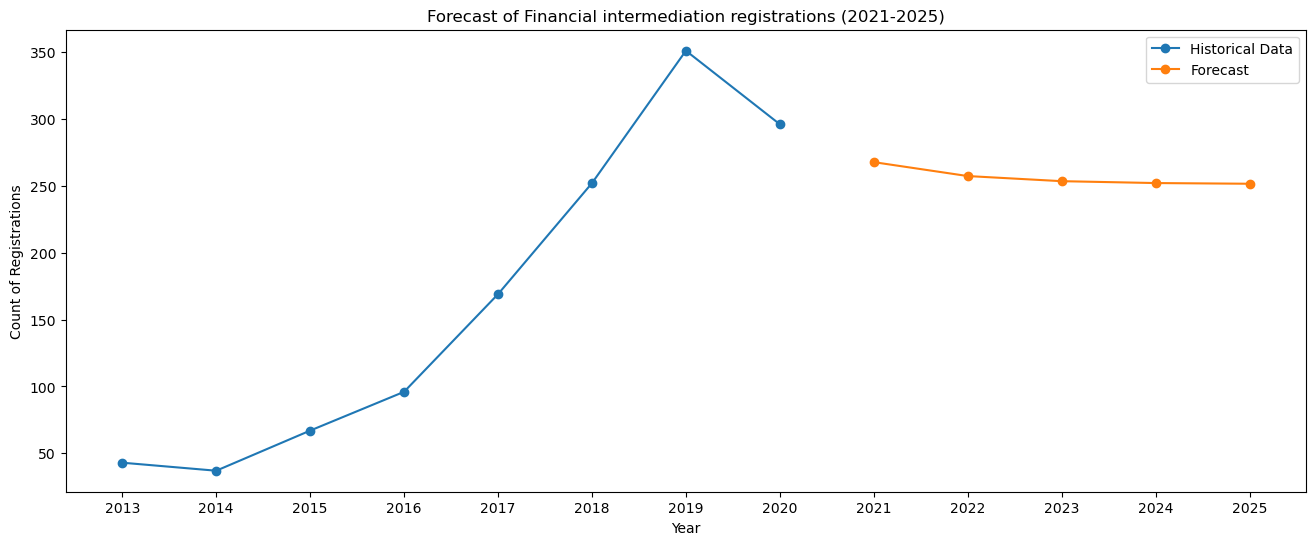

Forecasted registrations for Financial intermediation for 2021-2025:
2021-01-01    267.703130
2022-01-01    257.298502
2023-01-01    253.472770
2024-01-01    252.066065
2025-01-01    251.548827
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Computer and related activities',
    'Real estate activities',
    'Construction',
    'Financial intermediation'
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)